In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_path='/Users/User/Desktop/nyc_data/mos_nyc.csv'
data_jfk='/Users/User/Desktop/nyc_data/mos_jfk.csv'
data_lga='/Users/User/Desktop/nyc_data/mos_lga.csv'
data_obs='/Users/User/Desktop/nyc_data/obs_nyc.csv'


obs=pd.read_csv(data_obs)
cols=['station', 'model', 'runtime', 'ftime', 'n_x', 'tmp', 'dpt', 'cld',
       'wdr', 'wsp', 'p06', 'p12', 'q06', 'q12', 't06', 't12', 'snw', 'cig',
       'vis', 'obv', 'poz', 'pos', 'typ']
mjfk=pd.read_csv(data_jfk, names=cols)
mnyc=pd.read_csv(data_path,names=cols)
mlga=pd.read_csv(data_lga, names=cols)
ob

/Users/User/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,5,6,8,9,10,11,12,13,16,17,18,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/User/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,5,6,8,9,10,11,12,13,16,17,18,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
mjfk.head()

station  model                 runtime                   ftime  n_x  tmp  \
0  station  model                 runtime                   ftime  n_x  tmp   
1     KJFK    AVN  2000-05-30 12:00:00+00  2000-05-30 18:00:00+00  NaN   61   
2     KJFK    AVN  2000-05-30 12:00:00+00  2000-05-30 21:00:00+00  NaN   61   
3     KJFK    AVN  2000-05-30 12:00:00+00  2000-05-31 00:00:00+00  NaN   56   
4     KJFK    AVN  2000-05-30 12:00:00+00  2000-05-31 03:00:00+00  NaN   54   

   dpt  cld  wdr  wsp ...   q12  t06  t12  snw  cig  vis  obv  poz  pos  typ  
0  dpt  cld  wdr  wsp ...   q12  t06  t12  snw  cig  vis  obv  poz  pos  typ  
1   46  NaN   80   15 ...   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2   46  NaN  110   14 ...   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3   47  NaN  100   14 ...   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4   48  NaN  100    7 ...   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 23 columns]

In [3]:
cjfk=mjfk.drop(0,axis=0)

In [4]:
cnyc=mnyc.drop(0,axis=0)
clga=mlga.drop(0,axis=0)

In [5]:
cnyc['date']=pd.to_datetime(cnyc['runtime'])
cjfk['date']=pd.to_datetime(cjfk['runtime'])
clga['date']=pd.to_datetime(clga['runtime'])

In [6]:
cnyc['tmp']=cnyc['tmp'].astype(float)
cjfk['tmp']=cjfk['tmp'].astype(float)
clga['tmp']=clga['tmp'].astype(float)

In [7]:
cjfk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534660 entries, 1 to 534660
Data columns (total 24 columns):
station    534660 non-null object
model      534660 non-null object
runtime    534660 non-null object
ftime      534660 non-null object
n_x        126880 non-null object
tmp        532896 non-null float64
dpt        532896 non-null object
cld        533673 non-null object
wdr        534660 non-null object
wsp        534660 non-null object
p06        277827 non-null object
p12        126285 non-null object
q06        267377 non-null object
q12        121535 non-null object
t06        277211 non-null object
t12        12162 non-null object
snw        36034 non-null object
cig        533673 non-null object
vis        516033 non-null object
obv        516033 non-null object
poz        400596 non-null object
pos        400596 non-null object
typ        400596 non-null object
date       534660 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(22)
memory usage: 10

In [8]:
cjfk['date'].dt.time.head()

1    12:00:00
2    12:00:00
3    12:00:00
4    12:00:00
5    12:00:00
Name: date, dtype: object

In [9]:
hourly=cnyc[['date','tmp']].groupby(cnyc['date'].dt.time)

In [17]:
mnyc=cnyc
mjfk=cjfk
mlga=clga


In [11]:
datakeys = ['station','tmp','dpt','cld']
mnyc[datakeys]

station   tmp dpt cld
1         KNYC  46.0  28  CL
2         KNYC  49.0  28  CL
3         KNYC  47.0  31  SC
4         KNYC  47.0  35  SC
5         KNYC  45.0  37  SC
6         KNYC  45.0  39  OV
7         KNYC  46.0  41  OV
8         KNYC  47.0  44  OV
9         KNYC  46.0  46  OV
10        KNYC  46.0  46  OV
11        KNYC  43.0  43  OV
12        KNYC  39.0  35  OV
13        KNYC  38.0  30  OV
14        KNYC  36.0  26  BK
15        KNYC  35.0  24  SC
16        KNYC  37.0  22  SC
17        KNYC  39.0  21  BK
18        KNYC  39.0  20  BK
19        KNYC  36.0  21  BK
20        KNYC  34.0  18  BK
21        KNYC  32.0  20  BK
22        KNYC  43.0  34  SC
23        KNYC  45.0  37  SC
24        KNYC  45.0  38  SC
25        KNYC  45.0  40  OV
26        KNYC  45.0  41  OV
27        KNYC  46.0  43  OV
28        KNYC  46.0  43  OV
29        KNYC  45.0  41  OV
30        KNYC  43.0  38  OV
...        ...   ...  ..  ..
448300    KNYC  74.0  60  CL
448301    KNYC  82.0  61  OV
448302    KNYC  88.0  61  SC
448303    KNYC  87.0  62  OV
448304    KNYC  83.0  63  OV
448305    KNYC  79.0  64  OV
448306    KNYC  75.0  62  OV
448307    KNYC  73.0  60  CL
448308    KNYC  79.0  56  BK
448309    KNYC  68.0  54  CL
448310    KNYC  67.0  55  CL
448311    KNYC  70.0  57  CL
448312    KNYC  79.0  57  CL
448313    KNYC  85.0  55  CL
448314    KNYC  84.0  56  CL
448315    KNYC  79.0  56  CL
448316    KNYC  76.0  56  SC
448317    KNYC  74.0  57  CL
448318    KNYC  72.0  58  CL
448319    KNYC  74.0  60  CL
448320    KNYC  82.0  61  FW
448321    KNYC  89.0  61  CL
448322    KNYC  87.0  62  SC
448323    KNYC  83.0  64  SC
448324    KNYC  79.0  65  OV
448325    KNYC  75.0  63  OV
448326    KNYC  73.0  63  CL
448327    KNYC  73.0  62  CL
448328    KNYC  81.0  59  BK
448329    KNYC  77.0  58  BK

[448329 rows x 4 columns]

In [12]:
nyc=mnyc.groupby('runtime')

In [13]:
nyc.count()

station  model  ftime  n_x  tmp  dpt  cld  wdr  wsp  \
runtime                                                                       
2003-12-16 12:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-16 18:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-17 00:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-17 06:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-17 12:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-17 18:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-18 00:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-18 06:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-18 12:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-18 18:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-19 00:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-19 06:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-19 12:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-19 18:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-20 00:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-20 06:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-20 12:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-20 18:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-21 00:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-21 06:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-21 12:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-21 18:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-22 00:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-22 06:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-22 12:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-22 18:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-23 00:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-23 06:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-23 12:00:00+00       21     21     21    5   21   21   21   21   21   
2003-12-23 18:00:00+00       21     21     21    5   21   21   21   21   21   
...                         ...    ...    ...  ...  ...  ...  ...  ...  ...   
2018-07-01 18:00:00+00       21     21     21    5   21   21   21   21   21   
2018-07-02 00:00:00+00       21     21     21    5   21   21   21   21   21   
2018-07-02 06:00:00+00       21     21     21    5   21   21   21   21   21   
2018-07-02 12:00:00+00       21     21     21    5   21   21   21   21   21   
2018-07-02 18:00:00+00       21     21     21    5   21   21   21   21   21   
2018-07-03 00:00:00+00       21     21     21    5   21   21   21   21   21   
2018-07-03 06:00:00+00       21     21     21    5   21   21   21   21   21   
2018-07-03 12:00:00+00       21     21     21    5   21   21   21   21   21   
2018-07-03 18:00:00+00       21     21     21    5   21   21   21   21   21   
2018-07-04 00:00:00+00       21     21     21    5   21   21   21   21   21   
2018-07-04 06:00:00+00       21     21     21    5   21   21   21   21   21   
2018-07-04 12:00:00+00       21     21     21    5   21   21   21   21   21   
2018-07-04 18:00:00+00       21     21     21    5   21   21   21   21   21   
2018-07-05 00:00:00+00       21     21     21    5   21   21   21   21   21   
2018-07-05 06:00:00+00       21     21     21    5   21   21   21   21   21   
2018-07-05 12:00:00+00       21     21     21    5   21   21   21   21   21   
2018-07-05 18:00:00+00       21     21     21    5   21   21   21   21   21   
2018-07-06 00:00:00+00       21     21     21    5   21   21   21   21   2

In [14]:

jfk=mjfk.groupby(mjfk['date'].dt.hour)

In [15]:
nyc=mnyc.groupby(mnyc['date'].dt.hour)
#jfk=mjfk.groupby(mjfk['date'].dt.hour)
#lga=mlga.groupby(mlga['date'].dt.hour)

In [18]:
lga=mlga.groupby(mlga['date'].dt.hour)

In [19]:
cjfk.count()

station    534660
model      534660
runtime    534660
ftime      534660
n_x        126880
tmp        532896
dpt        532896
cld        533673
wdr        534660
wsp        534660
p06        277827
p12        126285
q06        267377
q12        121535
t06        277211
t12         12162
snw         36034
cig        533673
vis        516033
obv        516033
poz        400596
pos        400596
typ        400596
date       534660
dtype: int64

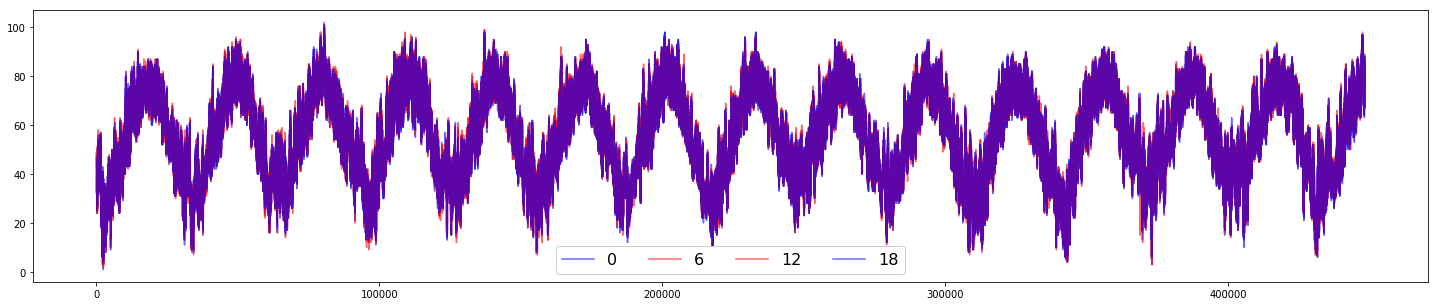

In [24]:
%matplotlib inline 
from cycler import cycler
cc=cycler(color=['blue','red','red','blue'])
fig = plt.figure(figsize=(25,5)) # creates empty canvas 
ax = fig.add_subplot(1,1,1)# creates an x/y axis 
ax.set_prop_cycle(cc)
_=nyc['tmp'].plot(ax=ax,  alpha=.6)
_= ax.legend(ncol=4, fontsize=16, facecolor='white', framealpha=1)


In [ ]:
ax.legend?

In [ ]:
#mlga['date'] = pd.to_datetime(mlga['runtime'])

In [ ]:
#lga=mlga.groupby(mlga['date'].dt.hour)

In [ ]:
#lga.count()

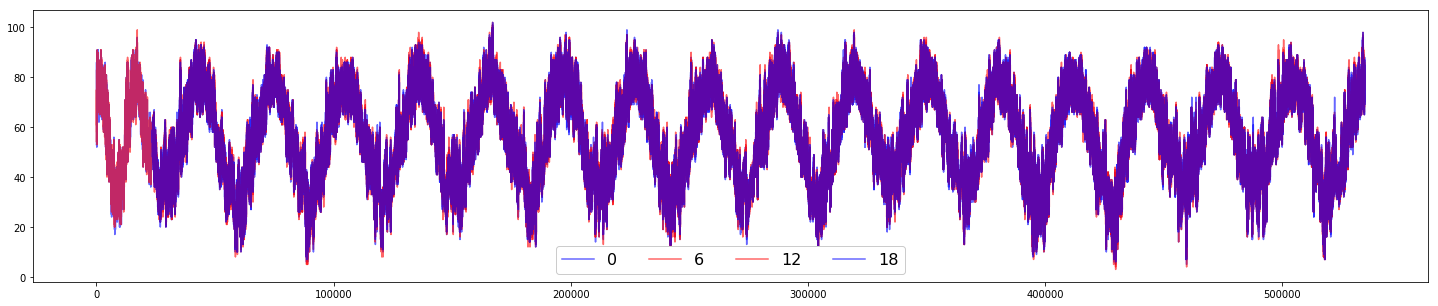

In [23]:
%matplotlib inline 
from cycler import cycler
cc=cycler(color=['blue','red','red','blue'])
fig = plt.figure(figsize=(25,5)) # creates empty canvas 
ax = fig.add_subplot(1,1,1)# creates an x/y axis 
ax.set_prop_cycle(cc)
_=lga['tmp'].plot(ax=ax,  alpha=.6)
_= ax.legend(ncol=4, fontsize=16, facecolor='white', framealpha=1)


In [ ]:
#mjfk['date'] = pd.to_datetime(mjfk['runtime'])

In [ ]:
#jfk=mjfk.groupby(mjfk['date'].dt.hour)

Text(0,0.5,'TEMPERATURE (F)')

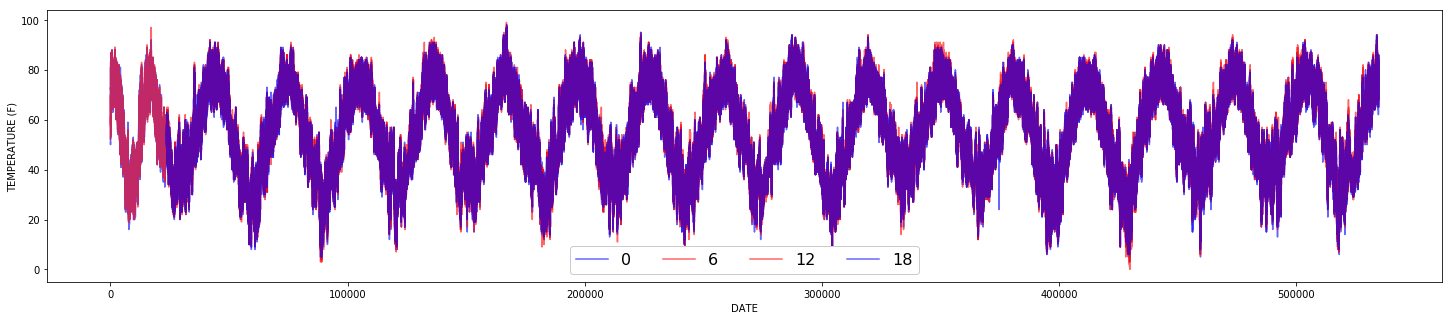

In [26]:
cc=cycler(color=['blue','red','red','blue'])
fig = plt.figure(figsize=(25,5)) # creates empty canvas 
ax = fig.add_subplot(1,1,1)# creates an x/y axis 
ax.set_prop_cycle(cc)
_=jfk['tmp'].plot(ax=ax,  alpha=.6)
_= ax.legend(ncol=4, fontsize=16, facecolor='white', framealpha=1)
plt.xlabel('DATE')
plt.ylabel('TEMPERATURE (F)')

In [27]:
obs_inds = obs['NAME'].str.match("NY CITY CENTRAL PARK, NY US")
obs= obs[obs_inds]
datakeys = ['DATE', u'TAVG', u'TMAX',u'TMIN', "LATITUDE", "LONGITUDE", "ELEVATION"]

In [28]:
obs[datakeys]

DATE  TAVG  TMAX  TMIN  LATITUDE  LONGITUDE  ELEVATION
0     2000-01-01  42.0  50.0  34.0  40.77898  -73.96925       42.7
1     2000-01-02  52.0  60.0  43.0  40.77898  -73.96925       42.7
2     2000-01-03  58.0  64.0  51.0  40.77898  -73.96925       42.7
3     2000-01-04  53.0  60.0  46.0  40.77898  -73.96925       42.7
4     2000-01-05  38.0  47.0  29.0  40.77898  -73.96925       42.7
5     2000-01-06  35.0  42.0  28.0  40.77898  -73.96925       42.7
6     2000-01-07  42.0  49.0  35.0  40.77898  -73.96925       42.7
7     2000-01-08  34.0  38.0  30.0  40.77898  -73.96925       42.7
8     2000-01-09  44.0  51.0  37.0  40.77898  -73.96925       42.7
9     2000-01-10  51.0  58.0  44.0  40.77898  -73.96925       42.7
10    2000-01-11  46.0  52.0  40.0  40.77898  -73.96925       42.7
11    2000-01-12  43.0  47.0  39.0  40.77898  -73.96925       42.7
12    2000-01-13  29.0  39.0  18.0  40.77898  -73.96925       42.7
13    2000-01-14  18.0  22.0  13.0  40.77898  -73.96925       42.7
14    2000-01-15  24.0  30.0  17.0  40.77898  -73.96925       42.7
15    2000-01-16  34.0  46.0  21.0  40.77898  -73.96925       42.7
16    2000-01-17  14.0  21.0   7.0  40.77898  -73.96925       42.7
17    2000-01-18  11.0  19.0   3.0  40.77898  -73.96925       42.7
18    2000-01-19  20.0  29.0  10.0  40.77898  -73.96925       42.7
19    2000-01-20  26.0  28.0  23.0  40.77898  -73.96925       42.7
20    2000-01-21  17.0  23.0  10.0  40.77898  -73.96925       42.7
21    2000-01-22  14.0  20.0   8.0  40.77898  -73.96925       42.7
22    2000-01-23  23.0  27.0  18.0  40.77898  -73.96925       42.7
23    2000-01-24  32.0  38.0  26.0  40.77898  -73.96925       42.7
24    2000-01-25  28.0  30.0  25.0  40.77898  -73.96925       42.7
25    2000-01-26  27.0  31.0  22.0  40.77898  -73.96925       42.7
26    2000-01-27  17.0  22.0  12.0  40.77898  -73.96925       42.7
27    2000-01-28  16.0  22.0   9.0  40.77898  -73.96925       42.7
28    2000-01-29  26.0  35.0  17.0  40.77898  -73.96925       42.7
29    2000-01-30  29.0  36.0  21.0  40.77898  -73.96925       42.7
...          ...   ...   ...   ...       ...        ...        ...
6732  2018-06-07   NaN  71.0  60.0  40.77898  -73.96925       42.7
6733  2018-06-08   NaN  82.0  60.0  40.77898  -73.96925       42.7
6734  2018-06-09   NaN  83.0  67.0  40.77898  -73.96925       42.7
6735  2018-06-10   NaN  73.0  58.0  40.77898  -73.96925       42.7
6736  2018-06-11   NaN  73.0  58.0  40.77898  -73.96925       42.7
6737  2018-06-12   NaN  75.0  57.0  40.77898  -73.96925       42.7
6738  2018-06-13   NaN  78.0  63.0  40.77898  -73.96925       42.7
6739  2018-06-14   NaN  84.0  67.0  40.77898  -73.96925       42.7
6740  2018-06-15   NaN  76.0  63.0  40.77898  -73.96925       42.7
6741  2018-06-16   NaN  85.0  64.0  40.77898  -73.96925       42.7
6742  2018-06-17   NaN  91.0  66.0  40.77898  -73.96925       42.7
6743  2018-06-18   NaN  91.0  73.0  40.77898  -73.96925       42.7
6744  2018-06-19   NaN  88.0  75.0  40.77898  -73.96925       42.7
6745  2018-06-20   NaN  83.0  69.0  40.77898  -73.96925       42.7
6746  2018-06-21   NaN  83.0  65.0  40.77898  -73.96925       42.7
6747  2018-06-22   NaN  75.0  62.0  40.77898  -73.96925       42.7
6748  2018-06-23   NaN  66.0  62.0  40.77898  -73.96925       42.7
6749  2018-06-24   NaN  84.0  66.0  40.77898  -73.96925       42.7
6750  2018-06-25   NaN  81.0  67.0  40.77898  -73.96925       42.7
6751  2018-06-26   NaN  78.0  61.0  40.77898  -73.96925       42.7
6752  2018-06-27   NaN  73.0  66.0  40.77898  -73.96925       42.7
6753  2018-06-28   NaN  83.0  70.0  40.77898  -73.96925       42.7
6754  2018-06-29   NaN  89.0  70.0  40.77898  -73.96925       42.7
6755  2018-06-30   NaN  93.0  72.0  40.77898  -73.96925       42.7
6756  2018-07-01   NaN  96.0  79.0  40.77898  -73.96925       42.7
6757  2018-07-02   NaN  95.0  79.0  40.77898  -73.96925       42.7
6758  2018-07-03   NaN  92.0  77.0  40.77898  -73.96925       42.7
6759  2018-07-04   NaN  86.0  77.0  40.77898  -73.96925    

In [42]:
cols=['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'AWND',
       'FMTM', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'TSUN',
       'WDF2', 'WDF5', 'WESD', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03', 'WT04',
       'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT11', 'WT13', 'WT14', 'WT15',
       'WT16', 'WT17', 'WT18', 'WT19', 'WT21', 'WT22', 'WV01', 'WV20']
obs=pd.read_csv(data_obs, names=cols)
obs.head()

/Users/User/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


STATION                         NAME  LATITUDE  LONGITUDE  ELEVATION  \
0      STATION                         NAME  LATITUDE  LONGITUDE  ELEVATION   
1  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
2  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
3  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
4  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   

         DATE  AWND   FMTM   PGTM  PRCP  ...   WT14  WT15   WT16  WT17  WT18  \
0        DATE  AWND   FMTM   PGTM  PRCP  ...   WT14  WT15   WT16  WT17  WT18   
1  2000-01-01  5.82   1337   1337  0.00  ...    NaN   NaN    NaN   NaN   NaN   
2  2000-01-02  4.70   2314   2313  0.00  ...    NaN   NaN    NaN   NaN   NaN   
3  2000-01-03  6.71   0321   0320  0.00  ...    NaN   NaN    NaN   NaN   NaN   
4  2000-01-04  7.83   1840   1819  0.70  ...    NaN   NaN      1   NaN   NaN   

   WT19  WT21  WT22  WV01  WV20  
0  WT19  WT21  WT22  WV01  WV20  
1   NaN   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN   NaN  
4   NaN   NaN   NaN   NaN   NaN  

[5 rows x 42 columns]

In [43]:
obs=obs.drop(0,axis=0)

In [44]:
obs.head()

STATION                         NAME  LATITUDE  LONGITUDE ELEVATION  \
1  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925      42.7   
2  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925      42.7   
3  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925      42.7   
4  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925      42.7   
5  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925      42.7   

         DATE   AWND   FMTM   PGTM  PRCP ...  WT14 WT15   WT16 WT17 WT18 WT19  \
1  2000-01-01   5.82   1337   1337  0.00 ...   NaN  NaN    NaN  NaN  NaN  NaN   
2  2000-01-02   4.70   2314   2313  0.00 ...   NaN  NaN    NaN  NaN  NaN  NaN   
3  2000-01-03   6.71   0321   0320  0.00 ...   NaN  NaN    NaN  NaN  NaN  NaN   
4  2000-01-04   7.83   1840   1819  0.70 ...   NaN  NaN      1  NaN  NaN  NaN   
5  2000-01-05  11.41   0844   0843  0.00 ...   NaN  NaN      1  NaN  NaN  NaN   

  WT21 WT22 WV01 WV20  
1  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  
5  NaN  NaN  NaN  NaN  

[5 rows x 42 columns]

In [30]:
obs['date'] = pd.to_datetime(obs['DATE'])

In [31]:
obs=obs.groupby(obs['date'].dt.hour)

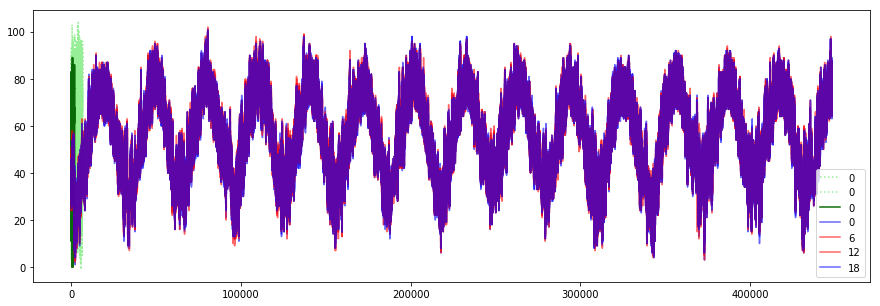

In [34]:
fig = plt.figure(figsize=(15,5))  
ax = fig.add_subplot(1,1,1)


_=obs['TMAX'].plot(ax=ax, color='lightgreen', linestyle=':', alpha=.95)
_=obs['TMIN'].plot(ax=ax, color='lightgreen', linestyle=':', alpha=.95)
_=obs['TAVG'].plot(ax=ax, color='darkgreen', alpha=.95)


cc=cycler(color=['blue','red','red','blue'])
#fig = plt.figure(figsize=(25,5))  
#ax = fig.add_subplot(1,1,1)
ax.set_prop_cycle(cc)
_=nyc['tmp'].plot(ax=ax,  alpha=.6)
#_= ax.legend(ncol=4, fontsize=16, facecolor='gray', framealpha=1)

ax.legend()


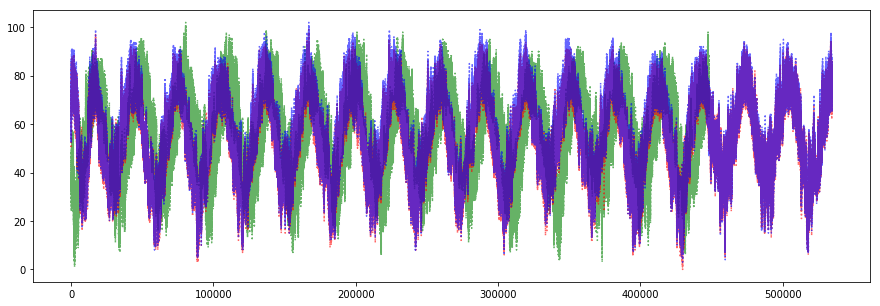

In [33]:
%matplotlib inline 
fig = plt.figure(figsize=(15,5)) 
ax = fig.add_subplot(1,1,1)
mnyc['tmp'].plot(ax=ax, color='green', linestyle=':', alpha=.6)
mjfk['tmp'].plot(ax=ax, color='red', linestyle=':', alpha=.6)
mlga['tmp'].plot(ax=ax, color='blue', linestyle=':', alpha=.6)




In [ ]:
list(nyc['tmp'])[0][-1].index

In [ ]:
list(obs['TMAX'])[0][-1].index